In [1]:
from hplc.io import load_chromatogram
from hplc.quant import Chromatogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.signal import find_peaks
import numpy as np

Deconvolving mixture:   0%|          | 0/2 [00:00<?, ?it/s]/home/afonso/anaconda3/envs/PolyFoxScreen/lib/python3.12/site-packages/hplc/quant.py:619: UserWarning: 
-------------------------- Hey! Yo! Heads up! ----------------------------------
| This time window (from 263.2 to 3750.4) has 19 candidate peaks.
| This is a complex mixture and may take a long time to properly fit depending
| on how well resolved the peaks are. Reduce `buffer` if the peaks in this
| window should be separable by eye. Or maybe just go get something to drink.
--------------------------------------------------------------------------------

  warnings.warn(
Deconvolving mixture: 100%|██████████| 2/2 [00:12<00:00,  6.32s/it]


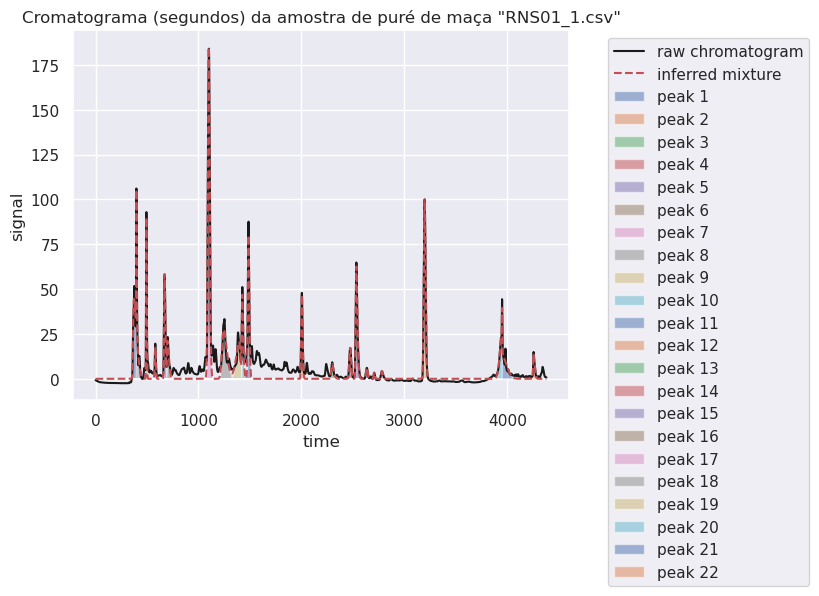

Deconvolving mixture:   0%|          | 0/2 [00:00<?, ?it/s]/home/afonso/anaconda3/envs/PolyFoxScreen/lib/python3.12/site-packages/hplc/quant.py:619: UserWarning: 
-------------------------- Hey! Yo! Heads up! ----------------------------------
| This time window (from 4.3867 to 62.507) has 31 candidate peaks.
| This is a complex mixture and may take a long time to properly fit depending
| on how well resolved the peaks are. Reduce `buffer` if the peaks in this
| window should be separable by eye. Or maybe just go get something to drink.
--------------------------------------------------------------------------------

  warnings.warn(
Deconvolving mixture: 100%|██████████| 2/2 [04:12<00:00, 126.42s/it]

   retention_time     scale       skew   amplitude          area  \
0             6.3  0.139507  -0.000918   15.123449   1134.258659   
0             6.6  0.051428  -0.000155   10.820539    811.540437   
0             6.7  0.288835  -0.001898   13.496929   1012.269641   
0             8.2  0.082382   2.314198   11.918309    893.873162   
0             9.7  0.071591  -0.011821    3.025016    226.876202   
0            11.1  0.145372   1.800915   14.258740   1069.405470   
0            11.6  0.206580   3.444502    6.076979    455.773424   
0            15.0  0.086514  -0.186028    1.018498     76.387328   
0            18.2  0.178846   0.997626   66.620719   4996.553859   
0            19.0  0.126950  -0.025974    3.892141    291.910568   
0            19.4  0.098282   0.008069    2.651521    198.864104   
0            20.7  0.247275   0.978680   13.501851   1012.638773   
0            23.1  0.170049  -0.000590    7.335551    550.166297   
0            23.3  8.526126   0.001653  147.7875

[<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='signal'>]

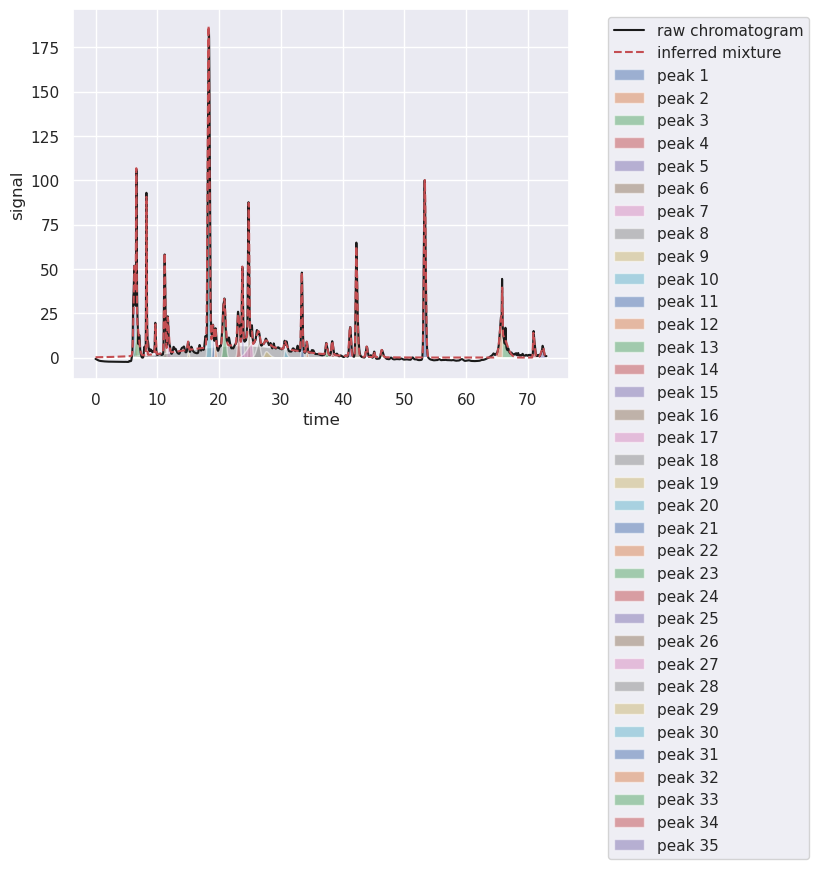

In [63]:
"""

segundos


"""

amostra1 = load_chromatogram('Data_PolyFoxScreen_CSV/Apple/RNS01_1.csv', cols={'time':'time', 'signal': 'signal' }, delimiter=',')
cromatograma_amostra1 = Chromatogram(amostra1, cols={'time': 'time', 'signal': 'signal'})
dados_picos_amostra1 = cromatograma_amostra1.fit_peaks(correct_baseline=False,approx_peak_width=100,buffer=100,prominence=0.04)
fig, ax = cromatograma_amostra1.show()
ax.set_title('Cromatograma (segundos) da amostra de puré de maça "RNS01_1.csv"')
plt.show()

""" 

milisegundos

"""

# amostra1_top = amostra1.copy()
# amostra1_top['time'] = amostra1['time'].apply(lambda x: x*1000)
# testes2 = Chromatogram(amostra1_top, cols={'time': 'time', 'signal': 'signal'})
# dados_picos_amostra1_top = testes2.fit_peaks(correct_baseline=False,approx_peak_width=100e3,buffer=100,prominence=0.04)
# testes2.show()


"""
minutos

"""
amostra1_top = amostra1.copy()
amostra1_top['time'] = amostra1['time'].apply(lambda x: x/60)
cromatograma_amostra1_top = Chromatogram(amostra1_top, cols={'time': 'time', 'signal': 'signal'})
dados_picos_amostra1_top = cromatograma_amostra1_top.fit_peaks(correct_baseline=False,approx_peak_width=0.1,buffer=100,prominence=0.02)
print(dados_picos_amostra1_top)
cromatograma_amostra1_top.show()








Com a atualização dos dados incorretos para os novos dados corretos, ajuste dos parametros conseguimos que a package leia quase perfeitamente os cromatogramas das amostras 

**IMPORTANTE:**  

-o tempo (coluna ‘time’) foi passado de segundos para minutos pois verificou-se que a package HPLC-py funcionou melhor;

-parametros da função fit_peaks:

correct_baseline=False,

approx_peak_width=0.1,buffer=100,

prominence=0.02